In [1]:
# Import necessary packages
import itertools
import json
import matplotlib.pyplot as plt
import numpy as np
import sys

# Custom imports
sys.path.insert(1, '../core')
from optimization import HashinShtrikman
from user_input import MaterialProperty, Material, MixtureProperty, Mixture

/Users/carlabecker/opt/anaconda3/envs/carla_mp_api/lib/python3.9/site-packages/mpcontribs/client/__init__.py:88: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)


In [2]:
# Testing without calls to generate final dict (faster)
import json
consolidated_dict = {}
with open("consolidated_dict_02_11_2024_23_45_58") as f:
    consolidated_dict = json.load(f)

## Example visualizations for an n=2 phase composite

In [3]:
# Example material matches for an n=2 phase compositie
mat_1_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
mat_2_ids = ["mp-12863", "mp-546266",]
matches_dict = {'mat1': mat_1_ids, 'mat2': mat_2_ids}

In [4]:
# Identify all of the possible combinations of the material matches
materials = list(matches_dict.values())
material_combinations = list(itertools.product(*materials))

In [5]:
# Use the first combination to demonstrate plotting
match = material_combinations[0]

In [6]:
# Need user input to create an HS instance
properties_mat_1 = [
    MaterialProperty(prop='elec_cond_300k_low_doping', upper_bound=20, lower_bound=1),
    MaterialProperty(prop='therm_cond_300k_low_doping', upper_bound=0.0001, lower_bound=1e-5),
    MaterialProperty(prop='bulk_modulus', upper_bound=100, lower_bound=50),
    MaterialProperty(prop='shear_modulus', upper_bound=100, lower_bound=80),
    MaterialProperty(prop='universal_anisotropy', upper_bound=2, lower_bound=1),
]

properties_mat_2 = [
    MaterialProperty(prop='elec_cond_300k_low_doping', upper_bound=5, lower_bound=2),
    MaterialProperty(prop='therm_cond_300k_low_doping', upper_bound=0.009, lower_bound=1e-4),
    MaterialProperty(prop='bulk_modulus', upper_bound=400, lower_bound=20),
    MaterialProperty(prop='shear_modulus', upper_bound=200, lower_bound=100),
    MaterialProperty(prop='universal_anisotropy', upper_bound=2.3, lower_bound=1.3),
]

# Define properties for the mixture
properties_mixture = [
    MixtureProperty(prop='elec_cond_300k_low_doping', desired_prop=9),
    MixtureProperty(prop='therm_cond_300k_low_doping', desired_prop=0.007),
    MixtureProperty(prop='bulk_modulus', desired_prop=234),
    MixtureProperty(prop='shear_modulus', desired_prop=150),
    MixtureProperty(prop='universal_anisotropy', desired_prop=1.5),
]

# Create Material & Mixture instances
mat_1 = Material(name='mat_1', properties=properties_mat_1)
mat_2 = Material(name='mat_2', properties=properties_mat_2)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mixture]

user_input = {}
for entity in aggregate:
    entity_name = entity.name
    properties = entity.properties
    user_input[entity_name] = {}
    for property in properties:  
        property_name = property.prop
        user_input[entity_name][property_name] = {}
        if type(property) == MaterialProperty:
            user_input[entity_name][property_name]['upper_bound'] = property.upper_bound  
            user_input[entity_name][property_name]['lower_bound'] = property.lower_bound   
        if type(property) == MixtureProperty:
            user_input[entity_name][property_name]['desired_prop'] = property.desired_prop

In [7]:
# Create an HS instance for testing
HS2 = HashinShtrikman(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-07-17 12:49:55,217 - custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/core/../io/inputs/mp_property_docs.yaml.
2024-07-17 12:49:55,224 - custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-07-17 12:49:55,224 - custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


all_effective_properties.shape: (99, 5)


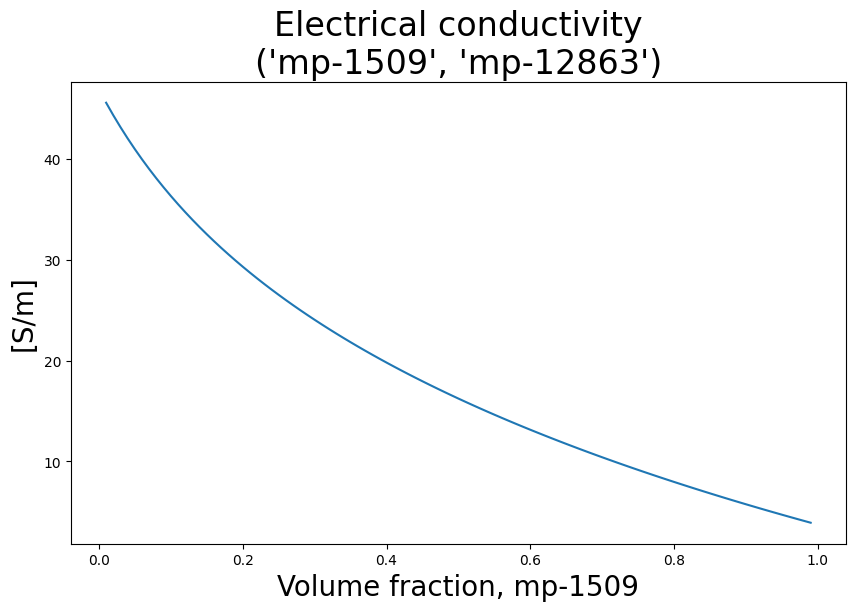

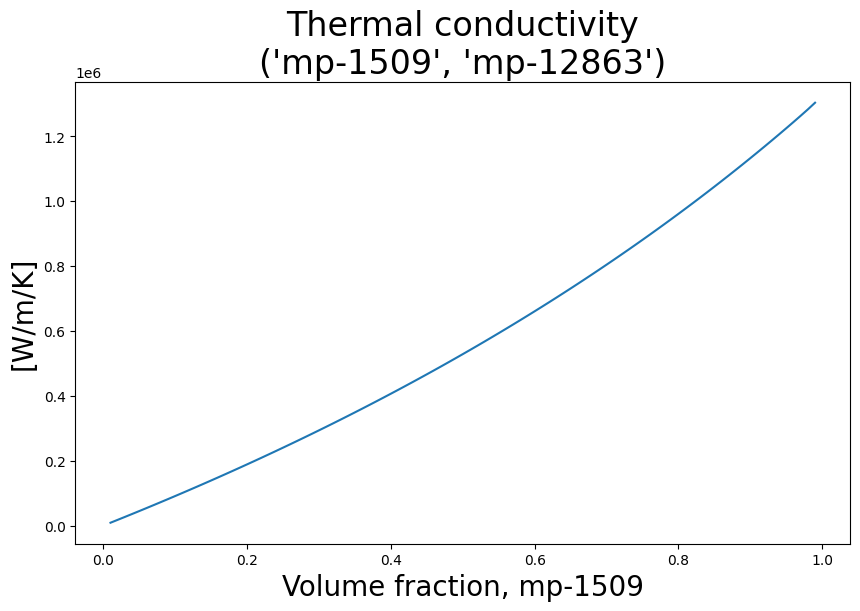

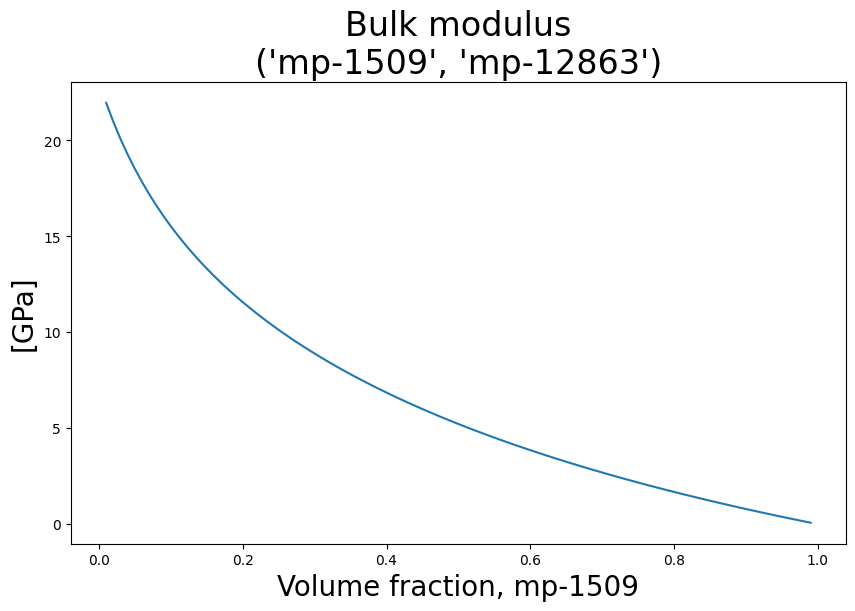

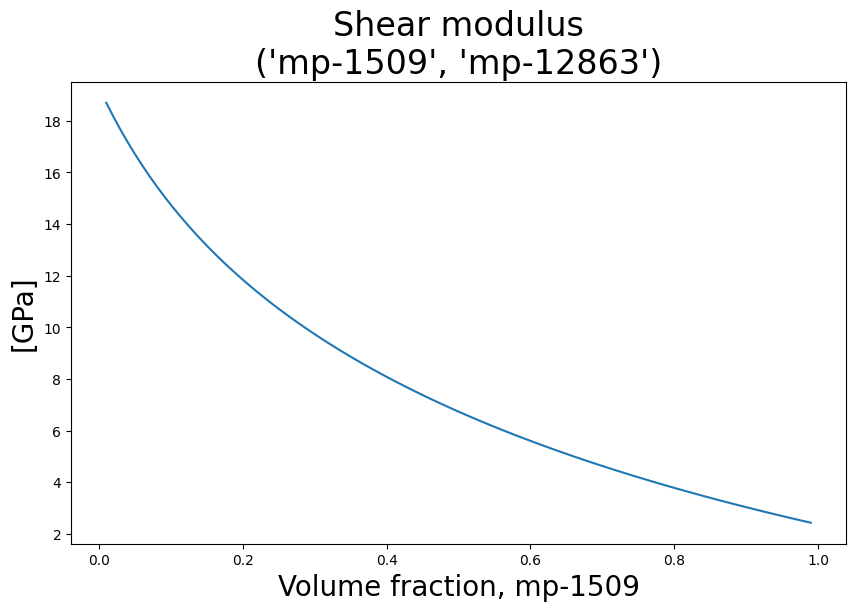

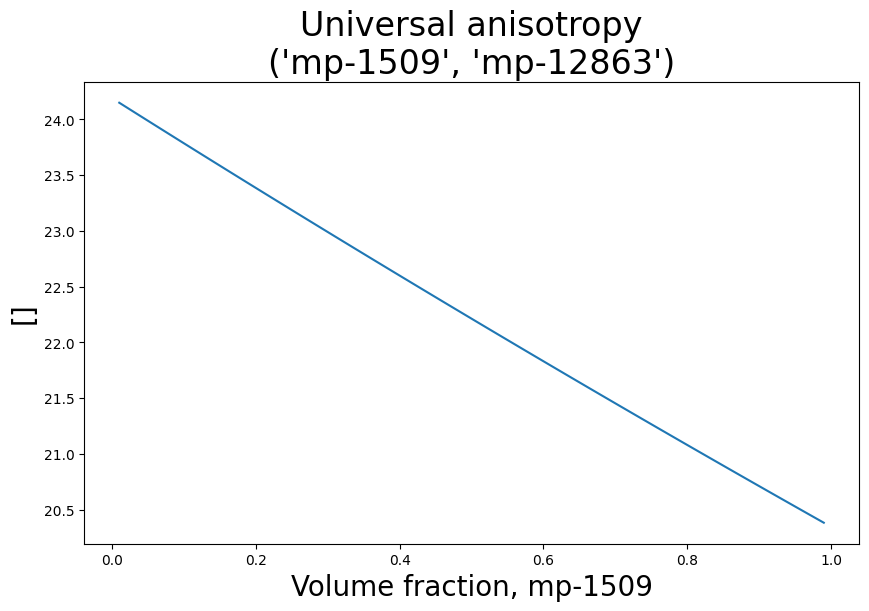

In [8]:
# Call the plot_material_match_cube function
HS2.visualize_composite_eff_props(match, consolidated_dict)

## Example visualizations for an n=3 phase composite

In [9]:
# Example material matches for an n=3 phase compositie
mat_1_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
mat_2_ids = ["mp-12863", "mp-546266",]
mat_3_ids = ["mp-546266"]
matches_dict = {'mat1': mat_1_ids, 'mat2': mat_2_ids, 'mat3': mat_3_ids}

In [10]:
# Identify all of the possible combinations of the material matches
materials = list(matches_dict.values())
material_combinations = list(itertools.product(*materials))

In [11]:
# Use the first combination to demonstrate plotting
match = material_combinations[0]

In [12]:
# Need user input to create an HS instance
properties_mat_1 = [
    MaterialProperty(prop='elec_cond_300k_low_doping', upper_bound=20, lower_bound=1),
    MaterialProperty(prop='therm_cond_300k_low_doping', upper_bound=0.0001, lower_bound=1e-5),
    MaterialProperty(prop='bulk_modulus', upper_bound=100, lower_bound=50),
    MaterialProperty(prop='shear_modulus', upper_bound=100, lower_bound=80),
    MaterialProperty(prop='universal_anisotropy', upper_bound=2, lower_bound=1),
]

properties_mat_2 = [
    MaterialProperty(prop='elec_cond_300k_low_doping', upper_bound=5, lower_bound=2),
    MaterialProperty(prop='therm_cond_300k_low_doping', upper_bound=0.009, lower_bound=1e-4),
    MaterialProperty(prop='bulk_modulus', upper_bound=400, lower_bound=20),
    MaterialProperty(prop='shear_modulus', upper_bound=200, lower_bound=100),
    MaterialProperty(prop='universal_anisotropy', upper_bound=2.3, lower_bound=1.3),
]

properties_mat_3 = [
    MaterialProperty(prop='elec_cond_300k_low_doping', upper_bound=10, lower_bound=1),
    MaterialProperty(prop='therm_cond_300k_low_doping', upper_bound=0.005, lower_bound=1e-4),
    MaterialProperty(prop='bulk_modulus', upper_bound=300, lower_bound=20),
    MaterialProperty(prop='shear_modulus', upper_bound=300, lower_bound=100),
    MaterialProperty(prop='universal_anisotropy', upper_bound=2.1, lower_bound=0.9),
]

# Define properties for the mixture
properties_mixture = [
    MixtureProperty(prop='elec_cond_300k_low_doping', desired_prop=9),
    MixtureProperty(prop='therm_cond_300k_low_doping', desired_prop=0.007),
    MixtureProperty(prop='bulk_modulus', desired_prop=234),
    MixtureProperty(prop='shear_modulus', desired_prop=150),
    MixtureProperty(prop='universal_anisotropy', desired_prop=1.5),
]

# Create Material & Mixture instances
mat_1 = Material(name='mat_1', properties=properties_mat_1)
mat_2 = Material(name='mat_2', properties=properties_mat_2)
mat_3 = Material(name='mat_3', properties=properties_mat_3)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mixture]

user_input = {}
for entity in aggregate:
    entity_name = entity.name
    properties = entity.properties
    user_input[entity_name] = {}
    for property in properties:  
        property_name = property.prop
        user_input[entity_name][property_name] = {}
        if type(property) == MaterialProperty:
            user_input[entity_name][property_name]['upper_bound'] = property.upper_bound  
            user_input[entity_name][property_name]['lower_bound'] = property.lower_bound   
        if type(property) == MixtureProperty:
            user_input[entity_name][property_name]['desired_prop'] = property.desired_prop

In [13]:
# Create an HS instance for testing
HS3 = HashinShtrikman(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-07-17 12:49:56,012 - custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/core/../io/inputs/mp_property_docs.yaml.
2024-07-17 12:49:56,022 - custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-07-17 12:49:56,023 - custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


all_effective_properties.shape: (9801, 5)


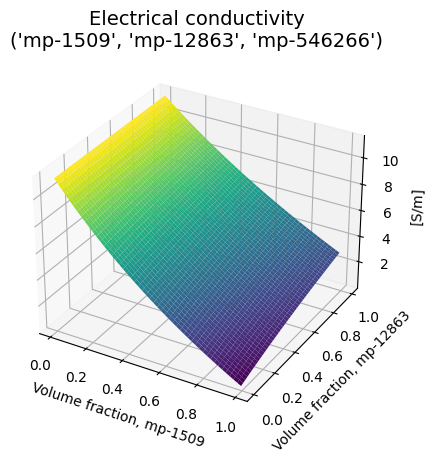

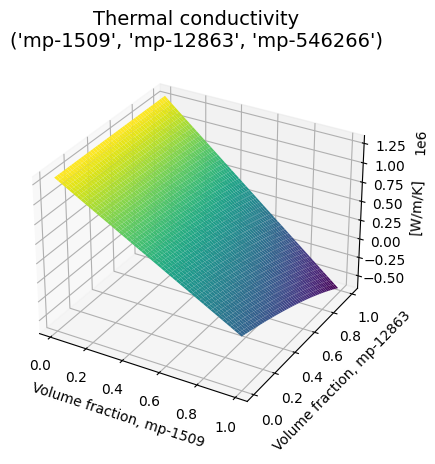

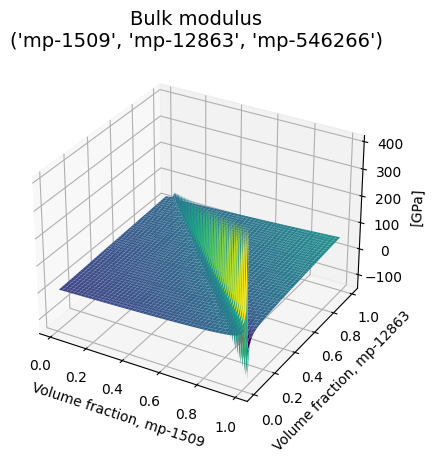

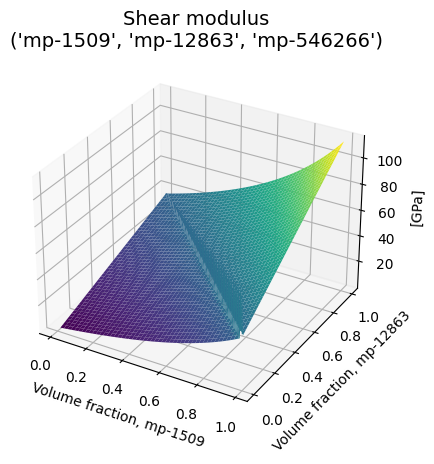

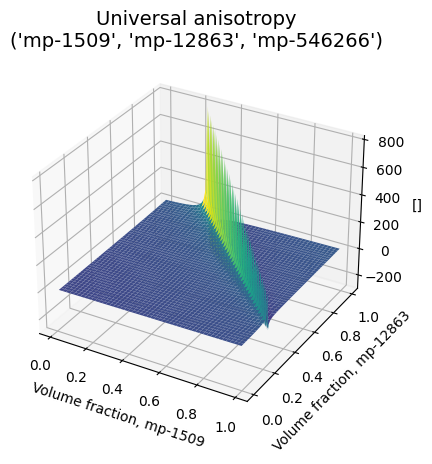

In [14]:
# Call the plot_material_match_cube function
HS3.visualize_composite_eff_props(match, consolidated_dict)

## Example visualizations for an n=4 phase composite

In [15]:
# Example material matches for an n=3 phase compositie
mat_1_ids = ["mp-1509", "mp-546266", "mp-16290"]
mat_2_ids = ["mp-12863", "mp-546266"]
mat_3_ids = ["mp-546266"]
mat_4_ids = ["mp-12863"]
matches_dict = {'mat1': mat_1_ids, 'mat2': mat_2_ids, 'mat3': mat_3_ids, 'mat4': mat_4_ids}

In [16]:
# Identify all of the possible combinations of the material matches
materials = list(matches_dict.values())
material_combinations = list(itertools.product(*materials))

In [17]:
# Use the first combination to demonstrate plotting
match = material_combinations[0]

In [18]:
# Need user input to create an HS instance
properties_mat_1 = [
    MaterialProperty(prop='elec_cond_300k_low_doping', upper_bound=20, lower_bound=1),
    MaterialProperty(prop='therm_cond_300k_low_doping', upper_bound=0.0001, lower_bound=1e-5),
    MaterialProperty(prop='bulk_modulus', upper_bound=100, lower_bound=50),
    MaterialProperty(prop='shear_modulus', upper_bound=100, lower_bound=80),
    MaterialProperty(prop='universal_anisotropy', upper_bound=2, lower_bound=1),
]

properties_mat_2 = [
    MaterialProperty(prop='elec_cond_300k_low_doping', upper_bound=5, lower_bound=2),
    MaterialProperty(prop='therm_cond_300k_low_doping', upper_bound=0.009, lower_bound=1e-4),
    MaterialProperty(prop='bulk_modulus', upper_bound=400, lower_bound=20),
    MaterialProperty(prop='shear_modulus', upper_bound=200, lower_bound=100),
    MaterialProperty(prop='universal_anisotropy', upper_bound=2.3, lower_bound=1.3),
]

properties_mat_3 = [
    MaterialProperty(prop='elec_cond_300k_low_doping', upper_bound=10, lower_bound=1),
    MaterialProperty(prop='therm_cond_300k_low_doping', upper_bound=0.005, lower_bound=1e-4),
    MaterialProperty(prop='bulk_modulus', upper_bound=300, lower_bound=20),
    MaterialProperty(prop='shear_modulus', upper_bound=300, lower_bound=100),
    MaterialProperty(prop='universal_anisotropy', upper_bound=2.1, lower_bound=0.9),
]

properties_mat_4 = [
    MaterialProperty(prop='elec_cond_300k_low_doping', upper_bound=15, lower_bound=1),
    MaterialProperty(prop='therm_cond_300k_low_doping', upper_bound=0.005, lower_bound=1e-4),
    MaterialProperty(prop='bulk_modulus', upper_bound=400, lower_bound=20),
    MaterialProperty(prop='shear_modulus', upper_bound=500, lower_bound=100),
    MaterialProperty(prop='universal_anisotropy', upper_bound=3, lower_bound=0.1),
]

# Define properties for the mixture
properties_mixture = [
    MixtureProperty(prop='elec_cond_300k_low_doping', desired_prop=9),
    MixtureProperty(prop='therm_cond_300k_low_doping', desired_prop=0.007),
    MixtureProperty(prop='bulk_modulus', desired_prop=234),
    MixtureProperty(prop='shear_modulus', desired_prop=150),
    MixtureProperty(prop='universal_anisotropy', desired_prop=1.5),
]

# Create Material & Mixture instances
mat_1 = Material(name='mat_1', properties=properties_mat_1)
mat_2 = Material(name='mat_2', properties=properties_mat_2)
mat_3 = Material(name='mat_3', properties=properties_mat_3)
mat_4 = Material(name='mat_4', properties=properties_mat_4)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mixture]

user_input = {}
for entity in aggregate:
    entity_name = entity.name
    properties = entity.properties
    user_input[entity_name] = {}
    for property in properties:  
        property_name = property.prop
        user_input[entity_name][property_name] = {}
        if type(property) == MaterialProperty:
            user_input[entity_name][property_name]['upper_bound'] = property.upper_bound  
            user_input[entity_name][property_name]['lower_bound'] = property.lower_bound   
        if type(property) == MixtureProperty:
            user_input[entity_name][property_name]['desired_prop'] = property.desired_prop

In [19]:
# Create an HS instance for testing
HS4 = HashinShtrikman(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-07-17 12:49:58,745 - custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/core/../io/inputs/mp_property_docs.yaml.
2024-07-17 12:49:58,751 - custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-07-17 12:49:58,752 - custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


all_effective_properties.shape: (8000, 5)


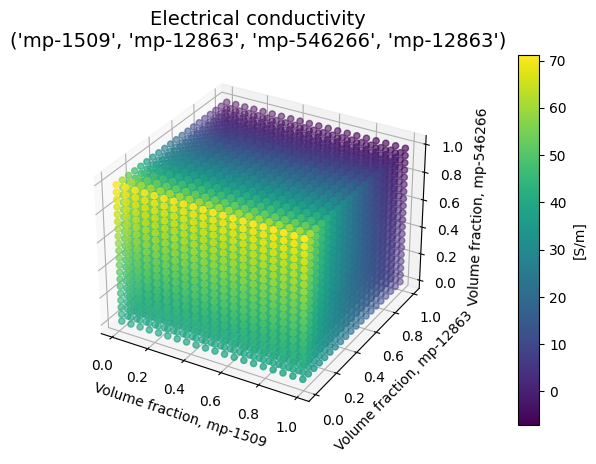

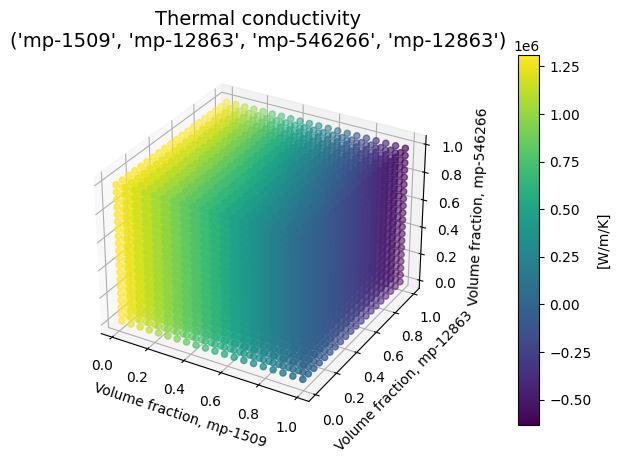

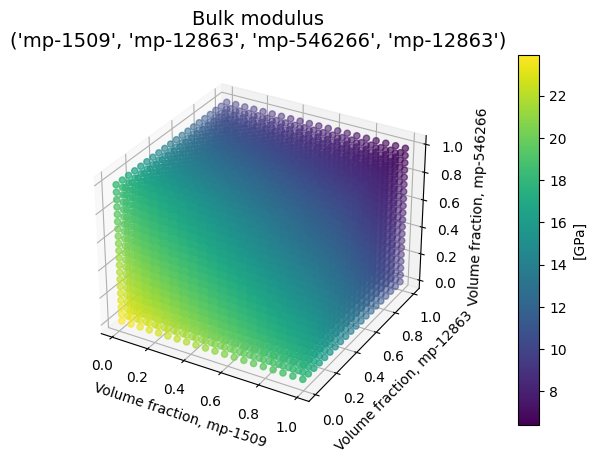

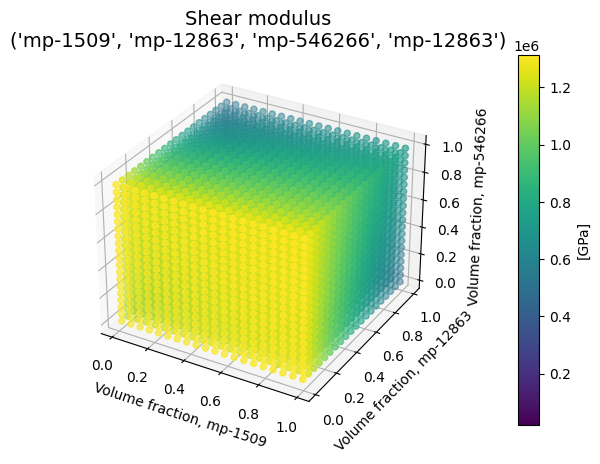

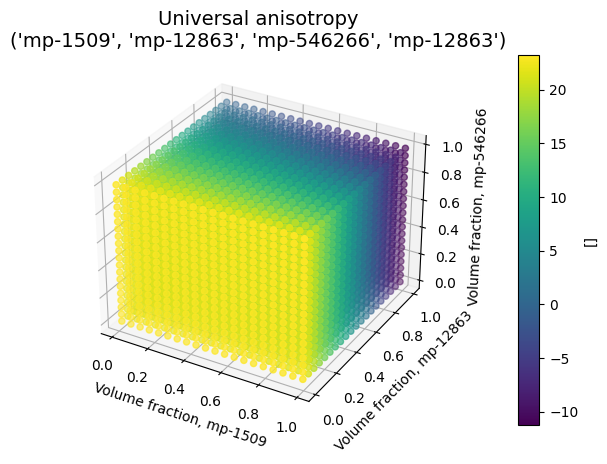

In [20]:
# Call the plot_material_match_cube function
HS4.visualize_composite_eff_props(match, consolidated_dict)